In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cell import Cell
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import copy

## first simulation growth without any abx as an integrity check

In [3]:
time_step = 0.1
param1 = {"ribo_min": 0.5, 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 1, 
         "k_off": 1, 
         "alpha": 0.05, # ribosome synthesis rate
         "beta": 0.05, # translation rate
         "gama": 0.01, # cell wall synthesis rate
         "abx_env": 0, 
         "t_start": 10000, 
         "t_end": -1}
my_sim1 = Cell(**param1)

In [9]:
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 300
t_eval = np.arange(0, length, time_step)
time_series = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [00:00<00:00, 331522.25‰/s]


In [10]:
print(time_series)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  2.998e+02  2.999e+02]
        y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 1.000e+00  1.003e+00 ...  5.549e+00  5.549e+00]
            ...
            [ 0.000e+00  2.505e-03 ...  4.549e+00  4.549e+00]
            [ 1.000e+00  1.000e+00 ...  9.001e+04  9.042e+04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 85
     njev: 0
      nlu: 0


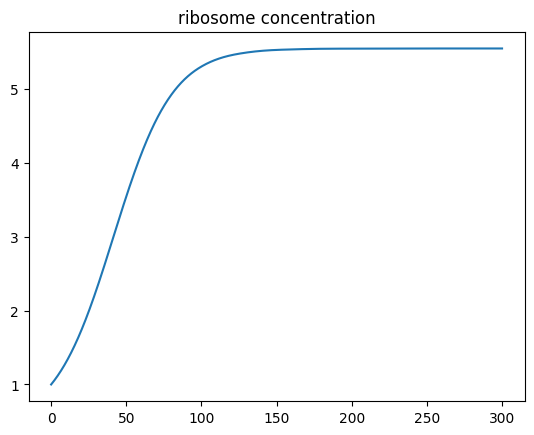

In [11]:
plt.plot(time_series.t, time_series.y[1])
plt.title("ribosome concentration")
plt.show()

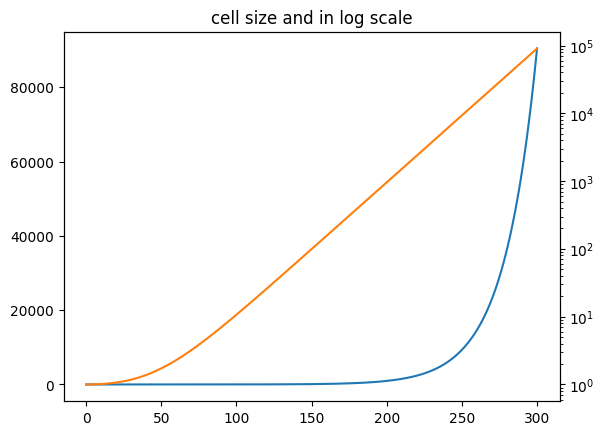

In [12]:
fig0, ax = plt.subplots()
ax.plot(time_series.t, time_series.y[4])
ax_twin = ax.twinx()
ax_twin.plot(time_series.t, time_series.y[4], color="C1")
ax_twin.set_yscale('log')
ax.set(title="cell size and in log scale")
plt.show()

## abx treatment - constant env

In [101]:
time_step = 0.1
admin_time = 150
recovery_time = 250
param2 = {"ribo_min": 0.5, 
          "p_in": 1, 
          "p_out": 1, 
          "k_on": 3, 
          "k_off": 0.1, 
          "alpha": 0.05, 
          "beta": 0.05, 
          "gama": 0.01, 
          "abx_env": 2, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim2 = Cell(**param2)

In [102]:
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 400
t_eval = np.arange(0, length, time_step)
time_series = my_sim2.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 9202.62‰/s]


In [103]:
# print(time_series)

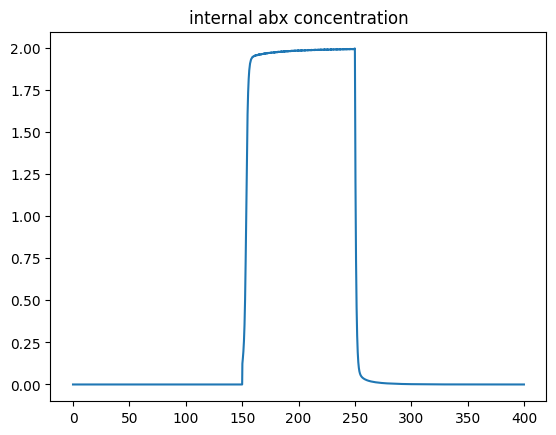

In [104]:
plt.plot(time_series.t, time_series.y[0])
plt.title("internal abx concentration")
plt.show()

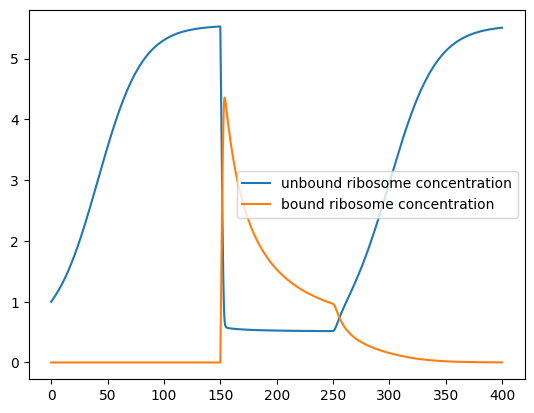

In [105]:
plt.plot(time_series.t, time_series.y[1], label="unbound ribosome concentration")
plt.plot(time_series.t, time_series.y[2], label="bound ribosome concentration")
plt.legend()
plt.show()

4.511167351384042


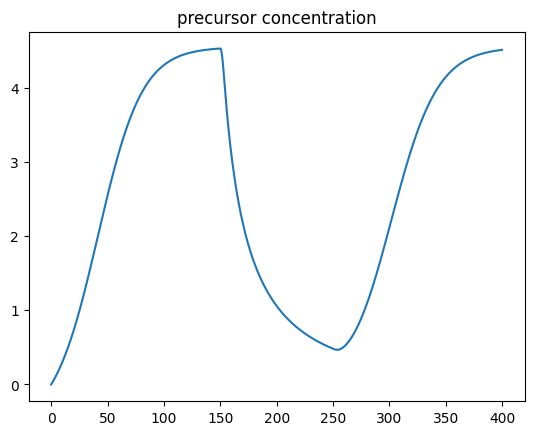

In [106]:
plt.plot(time_series.t, time_series.y[3])
plt.title("precursor concentration")
print(time_series.y[3][-1])
plt.show()

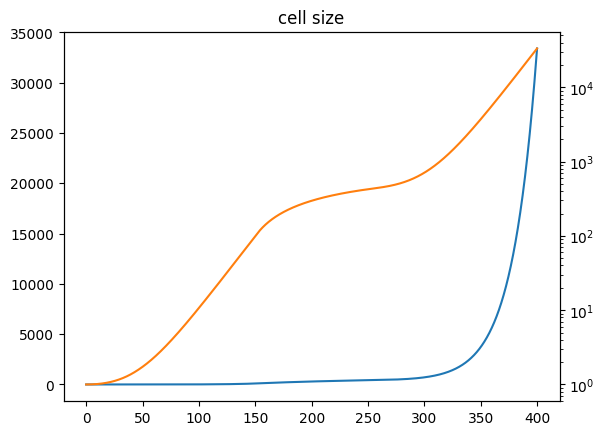

In [107]:
fig1, ax = plt.subplots()
ax.plot(time_series.t, time_series.y[4])
ax_twin = ax.twinx()
ax_twin.plot(time_series.t, time_series.y[4], color="C1")
ax_twin.set_yscale('log')
ax.set(title="cell size")
plt.show()

## try see cell size in perfect adder

In [121]:
print(len(time_series.y[4]))
cell_size = copy.deepcopy(time_series.y[4])
timer = 0
sizer = 1
adder = 2
birth_size = cell_size[0]
for i in range(len(cell_size)):
    # if timer >= 10:
    #     cell_size[i:] = cell_size[i:]/2
    #     timer = 0
    # else:
    #     timer += 1
    if recovery_time >= time_series.t[i] >= admin_time:
        birth_size = cell_size[i]
        continue
    
    if cell_size[i] - birth_size >= adder:
        cell_size[i:] = cell_size[i:]/2
        birth_size = cell_size[i]
    
    # if cell_size[i] >= sizer:
    #     print(f"division at {time_series.t[i]}, cell size {cell_size[i]}")
    #     cell_size[i:] = cell_size[i:]/2

4000


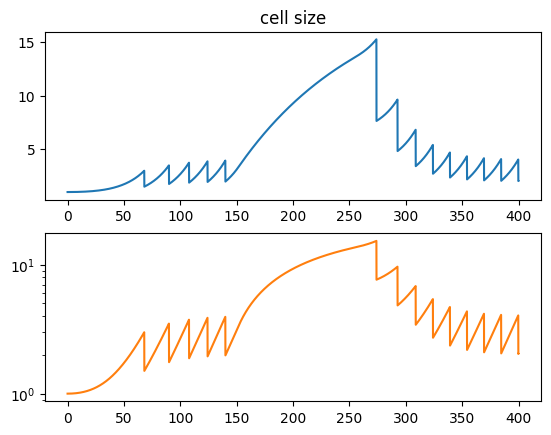

In [122]:
fig2, ax = plt.subplots(2)
ax[0].plot(time_series.t, cell_size)
# ax_twin = ax.twinx()
# ax_twin.plot(time_series.t, cell_size, color="C1")
# ax_twin.set_yscale('log')
ax[1].plot(time_series.t, cell_size, color="C1")
ax[1].set_yscale('log')
ax[0].set(title="cell size")
plt.show()

## perturb parameters

In [110]:
time_step = 0.1
param = {"ribo_min": 0.5, 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 2, 
         "k_off": 0.1, 
         "alpha": 0.05, 
         "beta": 0.05, 
         "gama": 0.05, 
         "abx_env": 2, 
         "t_start": admin_time, 
         "t_end": recovery_time}
my_sim2 = Cell(**param)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 400
t_eval = np.arange(0, length, time_step)
time_series2 = my_sim2.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 22734.71‰/s]


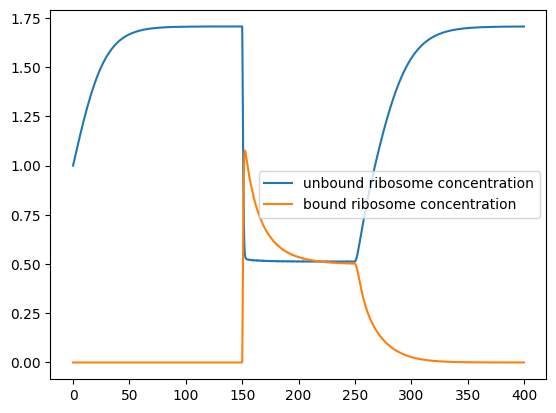

In [111]:
plt.plot(time_series2.t, time_series2.y[1], label="unbound ribosome concentration")
plt.plot(time_series2.t, time_series2.y[2], label="bound ribosome concentration")
plt.legend()
plt.show()

4000


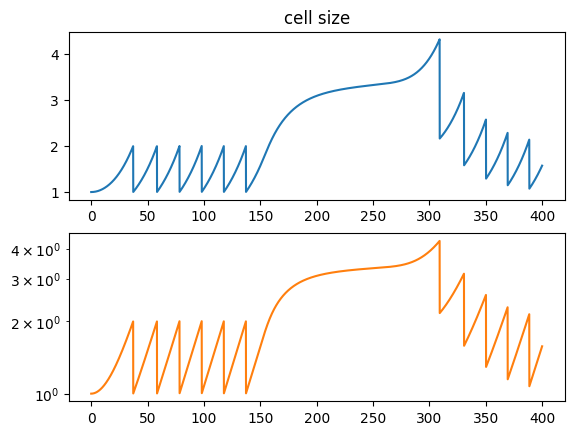

In [129]:
print(len(time_series2.y[4]))
cell_size2 = copy.deepcopy(time_series2.y[4])
timer = 0
sizer = 1
adder = 1
birth_size = cell_size2[0]
for i in range(len(cell_size2)):
    # if timer >= 10:
    #     cell_size[i:] = cell_size[i:]/2
    #     timer = 0
    # else:
    #     timer += 1
    if recovery_time >= time_series2.t[i] >= admin_time:
        birth_size = cell_size2[i]
        continue
    
    if cell_size2[i] - birth_size >= adder:
        cell_size2[i:] = cell_size2[i:]/2
        birth_size = cell_size2[i]
        
fig3, ax = plt.subplots(2)
ax[0].plot(time_series2.t, cell_size2)
ax[1].plot(time_series2.t, cell_size2, color="C1")
ax[1].set_yscale('log')
ax[0].set(title="cell size")
plt.show()

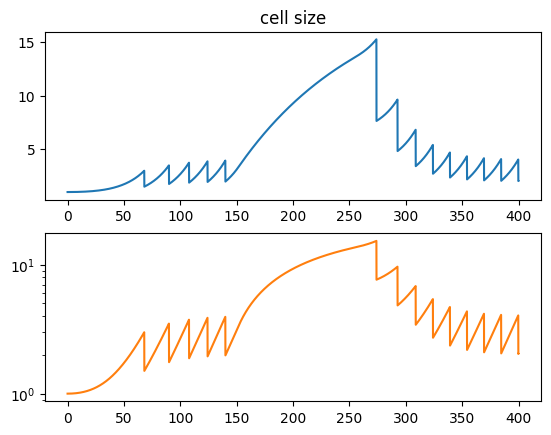

In [130]:
fig, ax = plt.subplots(2)
ax[0].plot(time_series.t, cell_size)
# ax_twin = ax.twinx()
# ax_twin.plot(time_series.t, cell_size, color="C1")
# ax_twin.set_yscale('log')
ax[1].plot(time_series.t, cell_size, color="C1")
ax[1].set_yscale('log')
ax[0].set(title="cell size")
plt.show()

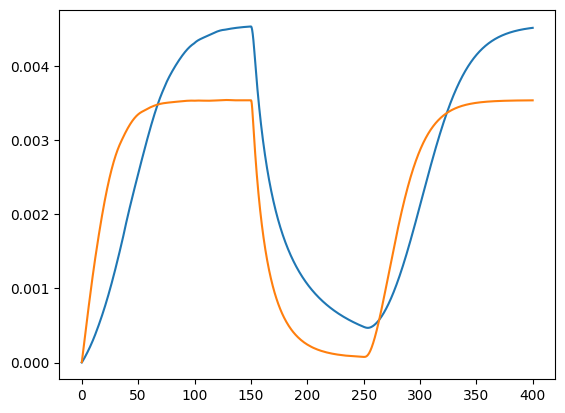

In [114]:
plt.plot(time_series.t, np.gradient(np.log(time_series.y[4])))
plt.plot(time_series2.t, np.gradient(np.log(time_series2.y[4])), color="C1")
# plt.yscale('log')
plt.show()

In [117]:
param = {"ribo_min": 0.5, 
         "p_in": 0.01, 
         "p_out": 0.01, 
         "k_on": 2, 
         "k_off": 0.1, 
         "alpha": 0.05, 
         "beta": 0.05, 
         "gama": 0.05, 
         "abx_env": 2, 
         "t_start": admin_time, 
         "t_end": recovery_time}
my_sim2 = Cell(**param)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 400
t_eval = np.arange(0, length, time_step)
time_series3 = my_sim2.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 52663.15‰/s]


4000


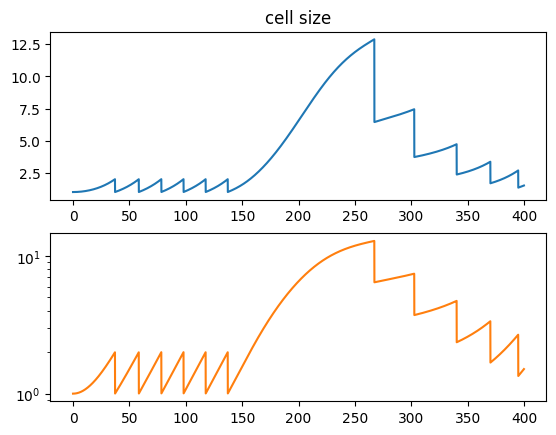

In [120]:

print(len(time_series3.y[4]))
cell_size2 = copy.deepcopy(time_series3.y[4])
timer = 0
sizer = 1
adder = 1
birth_size = cell_size2[0]
for i in range(len(cell_size2)):
    # if timer >= 10:
    #     cell_size[i:] = cell_size[i:]/2
    #     timer = 0
    # else:
    #     timer += 1
    if recovery_time >= time_series3.t[i] >= admin_time:
        birth_size = cell_size2[i]
        continue
    
    if cell_size2[i] - birth_size >= adder:
        cell_size2[i:] = cell_size2[i:]/2
        birth_size = cell_size2[i]
        
fig3, ax = plt.subplots(2)
ax[0].plot(time_series3.t, cell_size2)
ax[1].plot(time_series3.t, cell_size2, color="C1")
ax[1].set_yscale('log')
ax[0].set(title="cell size")
plt.show()